# Homework 3

Name: Tomoki Kyotani

NUID: ‭002986248‬

In [1]:
# Install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
import time
import statsmodels.api as sm

## 1. Create a custom linear regression model using the house pricing dataset(houseprices.csv) (20 points)

Import the dataset

In [2]:
df = pd.read_csv("~/Downloads/houseprices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


Looking at some statistics about this dataset

In [3]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


Assign the features and target to variables: x and y.

In [4]:
x = df.iloc[:, 2:]
y = df.iloc[:,1].values
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1790,2,2,2,No,East
1,2030,4,2,3,No,East
2,1740,3,2,1,No,East
3,1980,3,2,3,No,East
4,2130,3,3,3,No,East


Currently, "Brick" and "Neighborhood" columns are categorical and have unique values below:

In [5]:
# Print the unique values in "Brick" and "Neighborhood" columns

print(x['Brick'].unique())
print(x['Neighborhood'].unique())

['No' 'Yes']
['East' 'North' 'West']


Convert the categorical features ("Brick" and "Neighborhood") to integers (0/1) using one hot encoding

In [6]:
x = pd.get_dummies(df.iloc[:, 2:])
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,1,0,1,0,0
1,2030,4,2,3,1,0,1,0,0
2,1740,3,2,1,1,0,1,0,0
3,1980,3,2,3,1,0,1,0,0
4,2130,3,3,3,1,0,1,0,0


Scale the dataset

In [7]:
x_columns = x.columns

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
x.columns = x_columns
x.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,-1.000916,-1.415327,-0.868939,-0.542769,0.698836,-0.698836,1.358103,-0.723747,-0.661968
1,0.137904,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
2,-1.238171,-0.032412,-0.868939,-1.481614,0.698836,-0.698836,1.358103,-0.723747,-0.661968
3,-0.099350,-0.032412,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
4,0.612413,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968


### a) Split the dataset into training and test dataset 80:20

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state=11)

### b) Custom linear regression model should be in python class format (Should have init(), predict(), train() methods) and train the model using training dataset

Reference: IE7300 'Chapter 3 Multiple Linear Regression' file

In [9]:
class LinearRegression():
    def __init__(self, learning_rate, epochs):
        """Initialize a linear regression model.

        Parameters
        ----------
        learning_rate: Learning rate of Gradient Descent
        epochs: Number of iteration in Gradient Descent
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w_calculated, self.b_calculated, self.cost_list = None, None, None
    
    def train(self, x, y):
        """Train a linear regression model using the provided data.

        Parameters
        ----------
        x: Predictors
        y: Target
        """
        
        self.w_calculated, self.b_calculated, self.cost_list = self.__GradientDescent(x, y, np.zeros(x.shape[1]), 0)
    
    def predict(self, x):
        """Predict y based on the provided x

        Parameters
        ----------
        x: Predictors
        """
        return x.dot(self.w_calculated) + self.b_calculated
    
    def __CostFunction(self, loss, y_length):
        """Calculate cost of the model (Loss function)

        Parameters
        ----------
        loss: Calculated loss... y_hat - y
        y_length: length/number of y (target)
        """
        
        cost = np.sum((loss ** 2) / (2*y_length))
        return cost
    
    def __GradientDescent(self, x, y, w, b):
        """Perform Gradient Descent

        Parameters
        ----------
        x: Predictors
        y: Target
        w: Weights (coefficients)
        b: Bias (intercept)
        """
        
        cost_list = [0] * self.epochs

        for epoch in range(self.epochs):
            z = x.dot(w) + b
            loss = z - y

            weight_gradient = x.T.dot(loss) / len(y)
            bias_gradient = np.sum(loss) / len(y)

            w = w - self.learning_rate*weight_gradient
            b = b - self.learning_rate*bias_gradient

            cost = self.__CostFunction(loss, len(y))
            cost_list[epoch] = cost

            #if (epoch%(self.epochs/10)==0):
            #    print("Cost at epoch",epoch,"is:",cost)

        return w, b, cost_list

### c) Predict the house prices using test dataset

In [10]:
# Linear Regression model with learning rate 0.002 and epochs 10000
LR = LinearRegression(0.002, 10000)

# Train the model using the training dataset
LR.train(Xtrain, Ytrain)

# Predict the prices using the test dataset
y_pred = LR.predict(Xtest)

### d) Show the predicted output, and loss function output plots

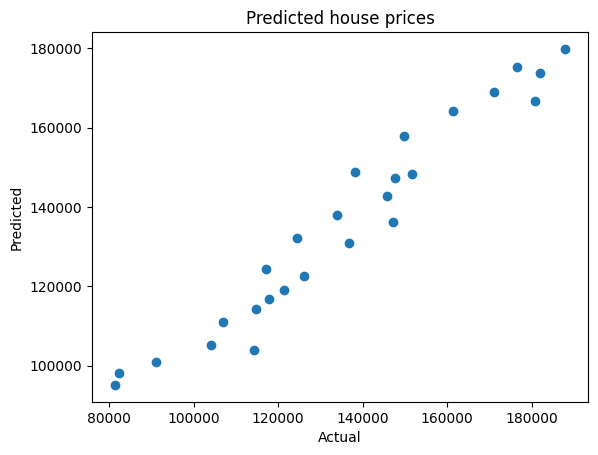

In [11]:
# Plot the predicted output vs 
plt.scatter(Ytest, y_pred.values)
plt.title('Predicted house prices')
plt.xlabel('Actual')
plt.ylabel('Predicted');

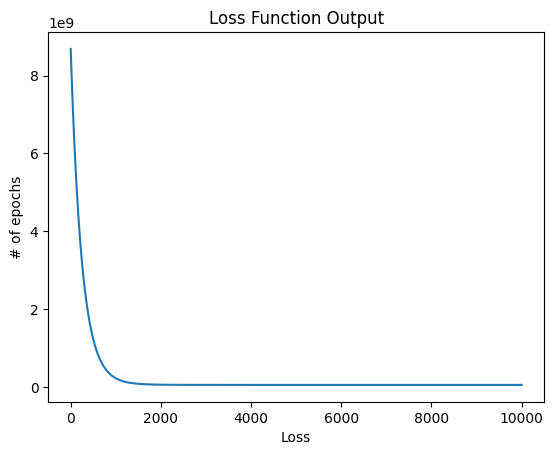

In [12]:
# Plot loss function output
plt.plot(LR.cost_list)
plt.title('Loss Function Output')
plt.xlabel('Loss')
plt.ylabel('# of epochs');

### e) Calculate the RMSE and R2 metrics

In [13]:
def rmse_score(y_pred, y):    
    return np.sqrt( np.sum( (y - y_pred)**2 )/len(y) )

def r2_score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [14]:
print("RMSE: ", rmse_score(y_pred.values, Ytest))
print("R2: ", r2_score(y_pred, Ytest))

RMSE:  7622.031147088628
R2:  0.9341473698945719


The calculated RMSE is 7622, and R2 is 0.934. 

In the original dataset, the house prices range from 69100 to 211200, so the RMSE 7622 with the R2 0.934 shows that the model is performing very well.

## 2. Perform model selection using subset best, forward selection, and backward selection methods (15 points)

Here, each method will be performed for the number of features ranging from 1 to 9 (there are 9 predictors in the dataset).

Reference: IE7300 'Chapter 3 Subset Selection' file.

### Best Subset Selection:

In [15]:
# Fit model on feature_set and calculate RSS
def process_subset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Ytrain, Xtrain[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(Xtest[list(feature_set)]) - Ytest) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [16]:
def get_best(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(Xtrain.columns, k):
        results.append(process_subset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [17]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,10):
    models_best.loc[i] = get_best(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 9 models on 1 predictors in 0.011313915252685547 seconds.
Processed 36 models on 2 predictors in 0.03319692611694336 seconds.
Processed 84 models on 3 predictors in 0.07825899124145508 seconds.
Processed 126 models on 4 predictors in 0.12288808822631836 seconds.
Processed 126 models on 5 predictors in 0.12505865097045898 seconds.
Processed 84 models on 6 predictors in 0.08551192283630371 seconds.
Processed 36 models on 7 predictors in 0.038537025451660156 seconds.
Processed 9 models on 8 predictors in 0.010202169418334961 seconds.
Processed 1 models on 9 predictors in 0.001402139663696289 seconds.
Total elapsed time: 0.5135340690612793 seconds.


### Forward Stepwise Selection:

In [18]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in Xtrain.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(process_subset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [19]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(Xtrain.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  9 models on 1 predictors in 0.025356054306030273 seconds.
Processed  8 models on 2 predictors in 0.016010046005249023 seconds.
Processed  7 models on 3 predictors in 0.011402130126953125 seconds.
Processed  6 models on 4 predictors in 0.008196830749511719 seconds.
Processed  5 models on 5 predictors in 0.006550788879394531 seconds.
Processed  4 models on 6 predictors in 0.005040884017944336 seconds.
Processed  3 models on 7 predictors in 0.0037963390350341797 seconds.
Processed  2 models on 8 predictors in 0.0025818347930908203 seconds.
Processed  1 models on 9 predictors in 0.0014808177947998047 seconds.
Total elapsed time: 0.08966898918151855 seconds.


### Backward Stepwise Selection:

In [20]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(process_subset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [21]:
models_bwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = Xtrain.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  9 models on 8 predictors in 0.03199577331542969 seconds.
Processed  8 models on 7 predictors in 0.01844310760498047 seconds.
Processed  7 models on 6 predictors in 0.012108087539672852 seconds.
Processed  6 models on 5 predictors in 0.008371353149414062 seconds.
Processed  5 models on 4 predictors in 0.006573915481567383 seconds.
Processed  4 models on 3 predictors in 0.004168033599853516 seconds.
Processed  3 models on 2 predictors in 0.0028679370880126953 seconds.
Processed  2 models on 1 predictors in 0.0019850730895996094 seconds.
Total elapsed time: 0.09487366676330566 seconds.


### a) Show your best model features

Plot the resulted RSSs for each method

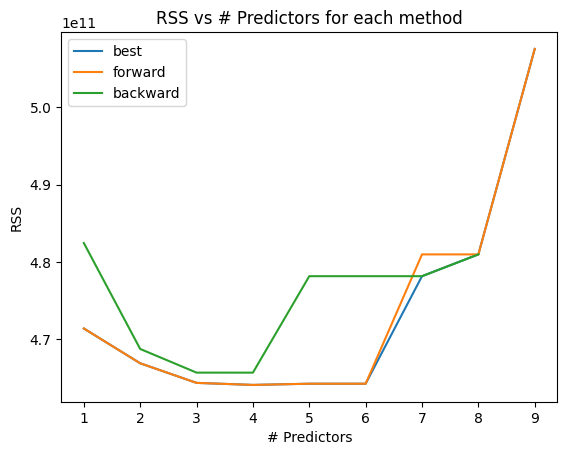

In [22]:
plt.plot(models_best["RSS"], label='best')
plt.plot(models_fwd["RSS"], label='forward')
plt.plot(models_bwd["RSS"], label='backward')

plt.title('RSS vs # Predictors for each method')
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.legend();

From the plots above, Best Subset and Forward Stepwise Selection models resulted in the smallest (best) RSS when the number of predictors is either 3, 4, 5, or 6.

Next, I will find out the exact number of predictors which resulted in the smallest RSS.

In [23]:
i_best = pd.to_numeric(models_best['RSS']).idxmin()

print("=== Best Subset Selection ===")
print("Smallest RSS: ", models_best.loc[i_best]['RSS'])
print("# Predictors: ", i_best)

=== Best Subset Selection ===
Smallest RSS:  464082392725.67804
# Predictors:  4


In [24]:
i_fwd = pd.to_numeric(models_fwd['RSS']).idxmin()

print("=== Forward Stepwise Selection ===")
print("Smallest RSS: ", models_fwd.loc[i_fwd]['RSS'])
print("# Predictors: ", i_fwd)

=== Forward Stepwise Selection ===
Smallest RSS:  464082392725.678
# Predictors:  4


Looking at the results above, both Best Subset and Forward Stepwise models resulted in the smallest RSS of 464082392725 when the number of predictors is equal to 4.

Since the computation time for Forward Stepwise is much faster than Best Subset, I choose the Forward Stepwise model with 4 predictors as the best model.

The features selected in this best model are: 'Neighborhood_West', 'SqFt', 'Offers', 'Bedrooms'

In [25]:
print("Features: ", models_fwd.loc[4]['model'].model.exog_names)

Features:  ['Neighborhood_West', 'SqFt', 'Offers', 'Bedrooms']


### b) Compare your model performance against the model Q1

As I noted in Q1 above, the custom Linear Regression model in Q1 results in 7622 RMSE and 0.934 R2. 

Now, I will calculate the RMSE and R2 for the Forward Stepwise model with 4 predictors selected in Q2-a.

In [26]:
selected_columns = models_fwd.loc[4]['model'].model.exog_names
y_pred_fwd = models_fwd.loc[4]['model'].predict(Xtest[selected_columns])

print("RMSE: ", rmse_score(y_pred_fwd, Ytest))
print("R2: ", r2_score(y_pred_fwd, Ytest))

RMSE:  133601.35776683356
R2:  -19.232680818679853


The bese model in Q2 resulted in 133601 RMSE and -19.23 R2.

Comparing these results, I can say that the custom Linear Regression model in Q1 performed much better than the selected model in Q2.